# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Alan Dharma Saputro Setiawan
- **Email:** muhamad.alan.dharma.saputro.setiawan@mail.ugm.ac.id
- **ID Dicoding:** alandh_m

## Menentukan Pertanyaan Bisnis

1. Berapa jumlah perbedaan penyewa sepeda untuk setiap tahunnya?
2. Apakah ada perbedaan pola peminjaman sepeda antara hari kerja dan hari libur?
3. Bagaimana tren harian jumlah sepeda yang dipinjam selama periode tertentu?
4. Bagaimana variabilitas harian peminjaman sepeda per jam?
5. Apakah terdapat perbedaan pola peminjaman sepeda antara hari kerja dan hari libur per jam?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
day = pd.read_csv("data\day.csv")
hour = pd.read_csv("data\hour.csv")

In [8]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [10]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [11]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
day.duplicated().sum()

0

In [15]:
hour.duplicated().sum()

0

In [16]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [17]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [18]:
# Mengganti tipe data datetime
day["dteday"] = pd.to_datetime(day["dteday"])
hour["dteday"] = pd.to_datetime(hour["dteday"])

In [19]:
print('day["dteday"]:', day['dteday'].dtypes)
print('hour["dteday"]:', hour['dteday'].dtypes)

day["dteday"]: datetime64[ns]
hour["dteday"]: datetime64[ns]


## Exploratory Data Analysis (EDA)

### Korelasi antara semua variabel numerik:

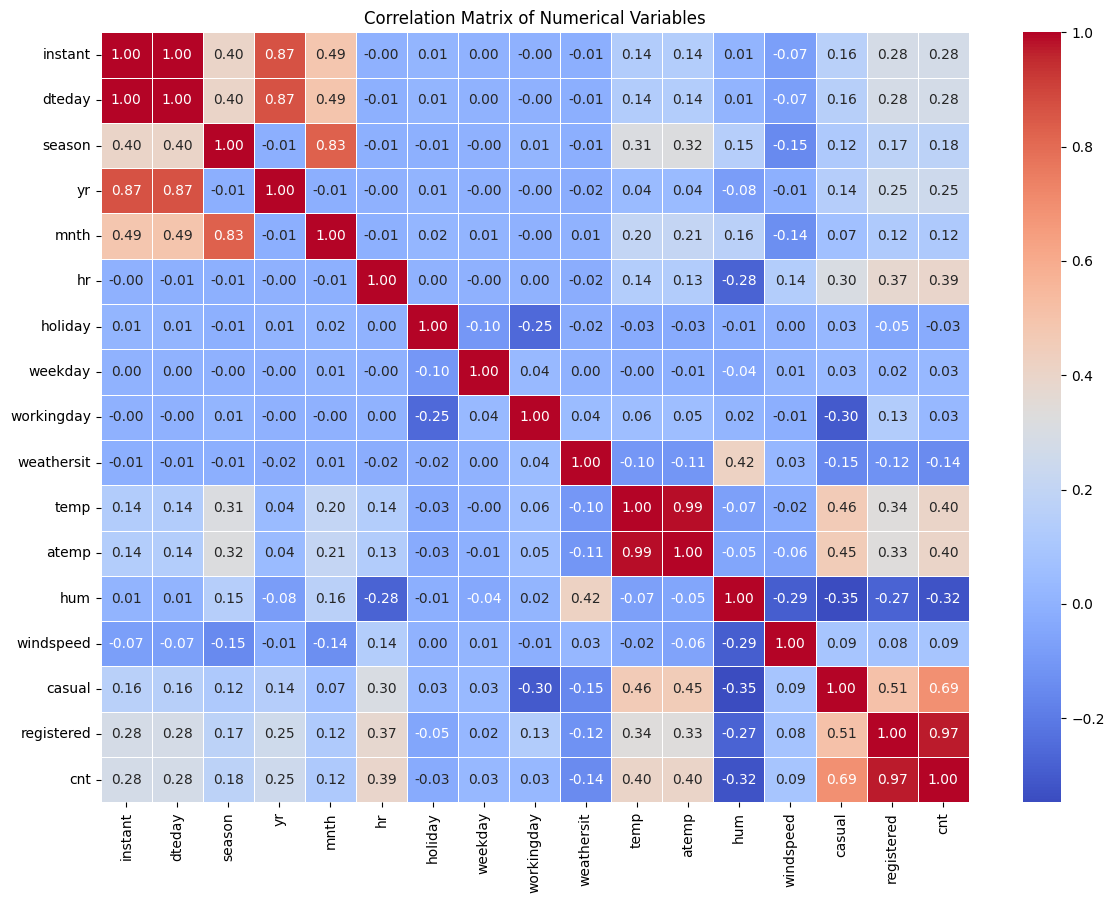

In [20]:
# Menghitung korelasi antara semua variabel numerik
correlation_matrix = hour.corr()

# Heatmap untuk memvisualisasikan matriks korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Korelasi antara variabel-variabel tertentu:

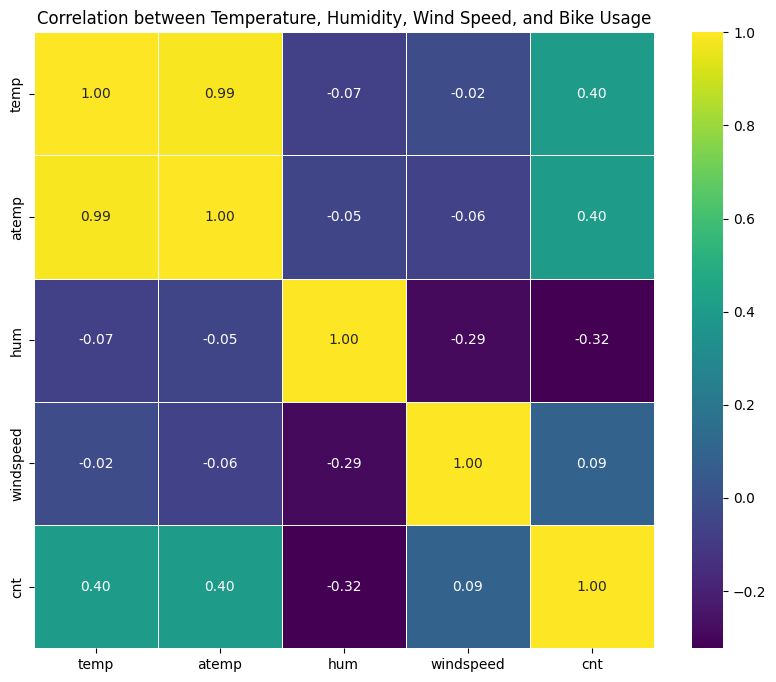

In [21]:
# Korelasi antara suhu, kelembaban, kecepatan angin dan jumlah pengguna sepeda
temperature_corr = hour[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Heatmap untuk memvisualisasikan korelasi antara variabel tertentu
plt.figure(figsize=(10, 8))
sns.heatmap(temperature_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation between Temperature, Humidity, Wind Speed, and Bike Usage')
plt.show()

### Distribusi musim terhadap variabel lain:

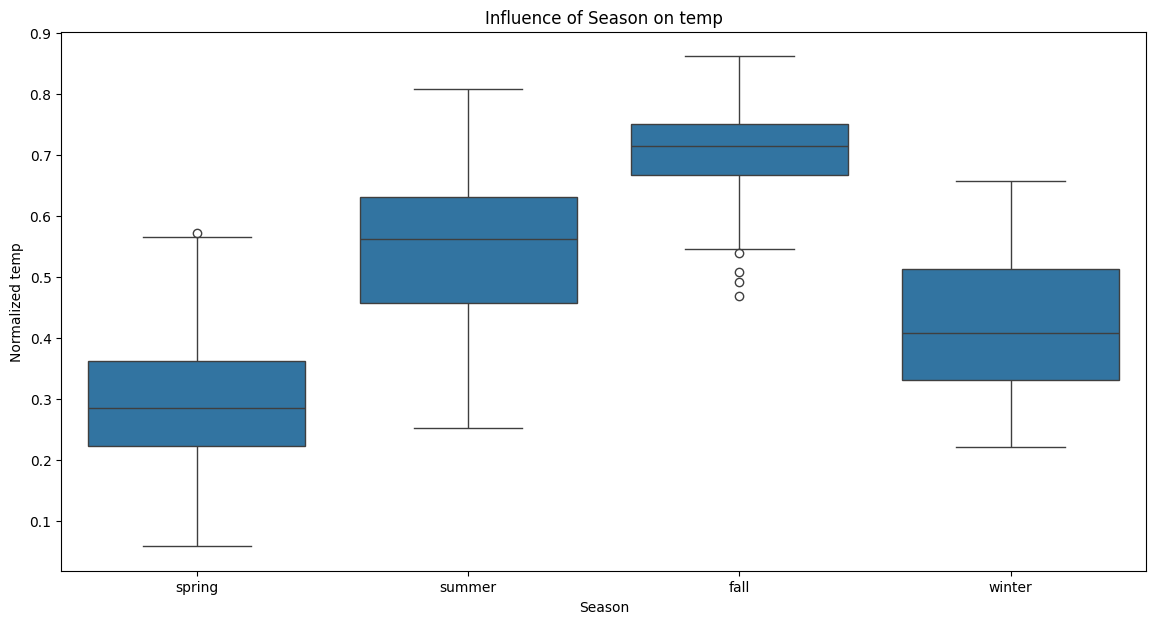

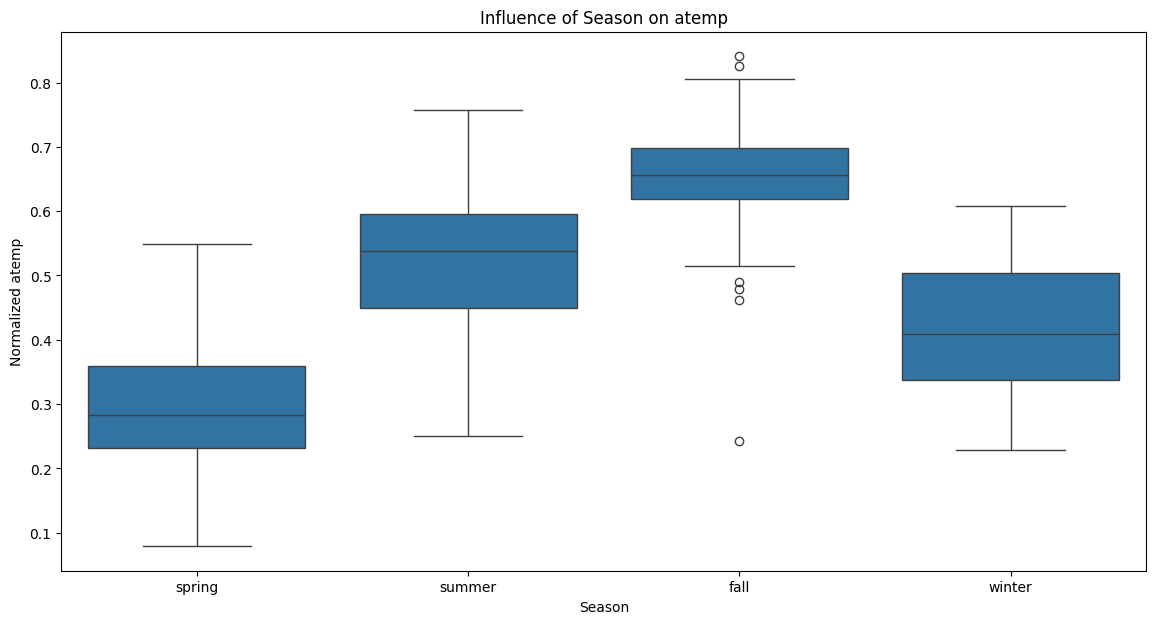

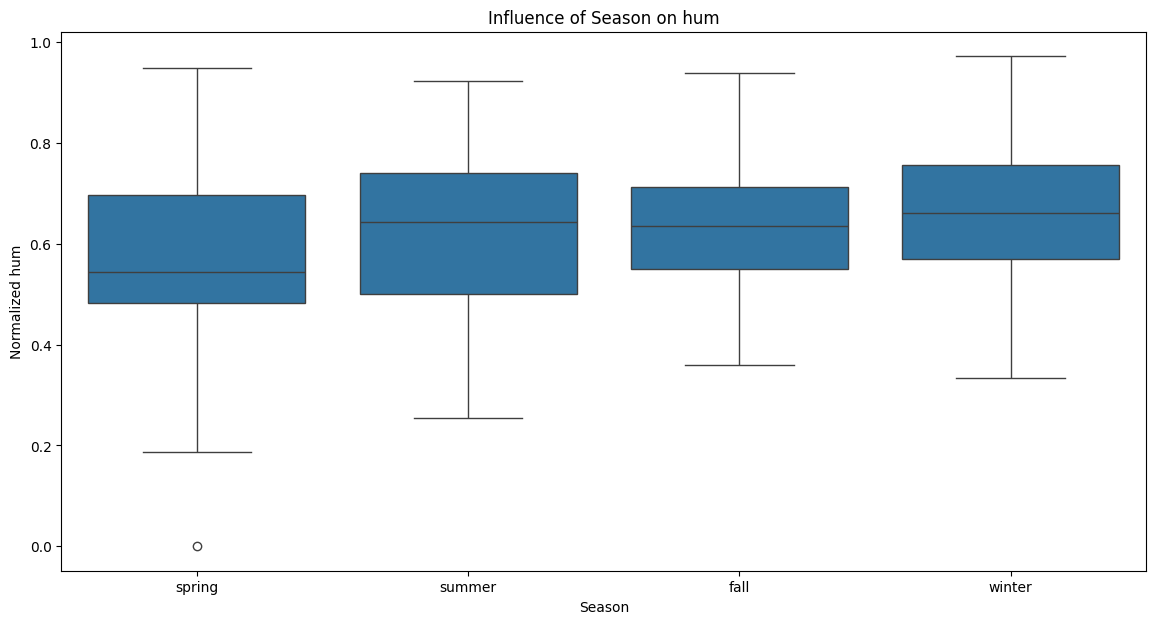

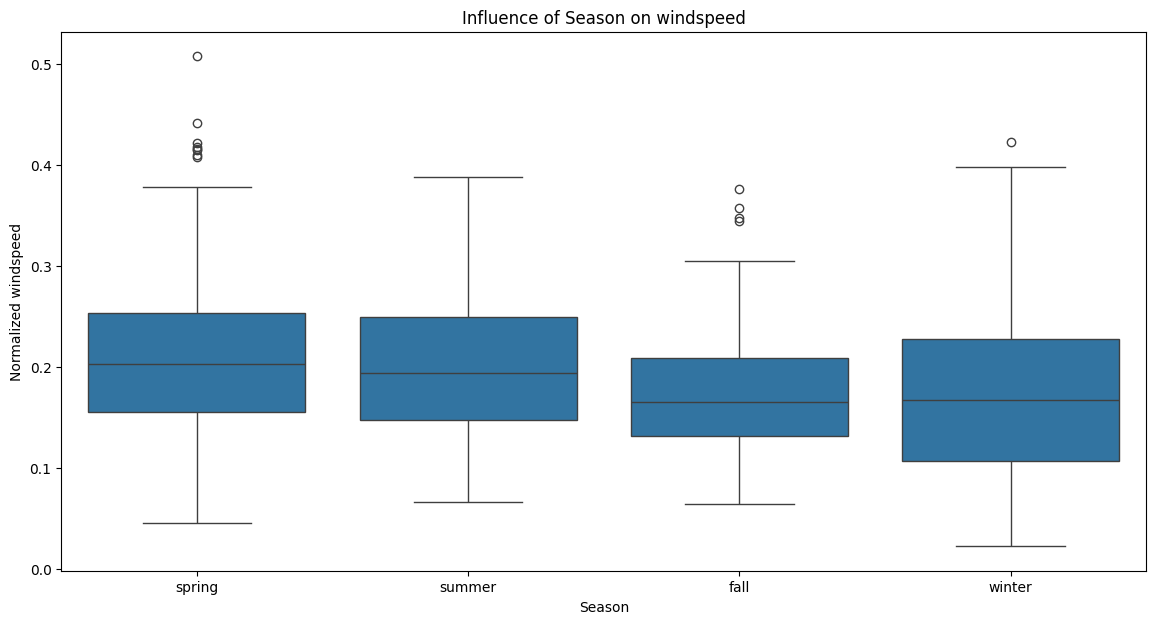

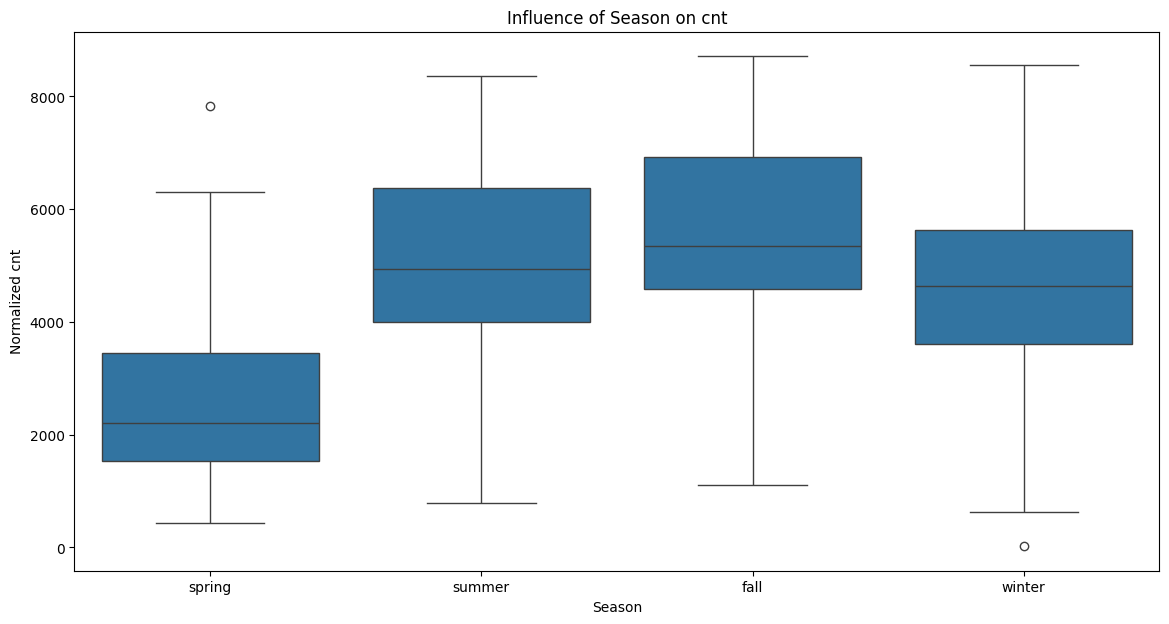

In [22]:
# Box plot untuk melihat pengaruh musim terhadap variabel suhu
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
season_labels = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

for i in numeric_var:
    plt.figure(figsize=(14, 7))
    day['season_label'] = day['season'].replace(season_labels)
    sns.boxplot(x='season_label', y=i, data=day)
    plt.xlabel('Season')
    plt.ylabel(f'Normalized {i}')
    plt.title(f'Influence of Season on {i}')
    plt.show()

# Hapus kolom tambahan setelah loop selesai
day.drop(columns=['season_label'], inplace=True)

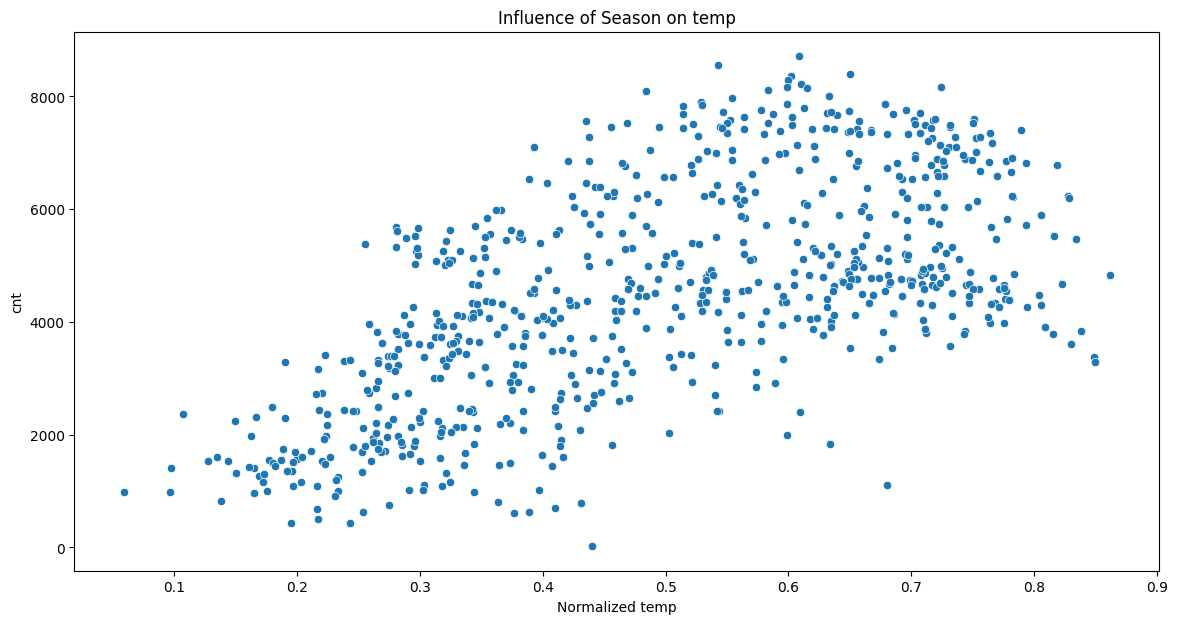

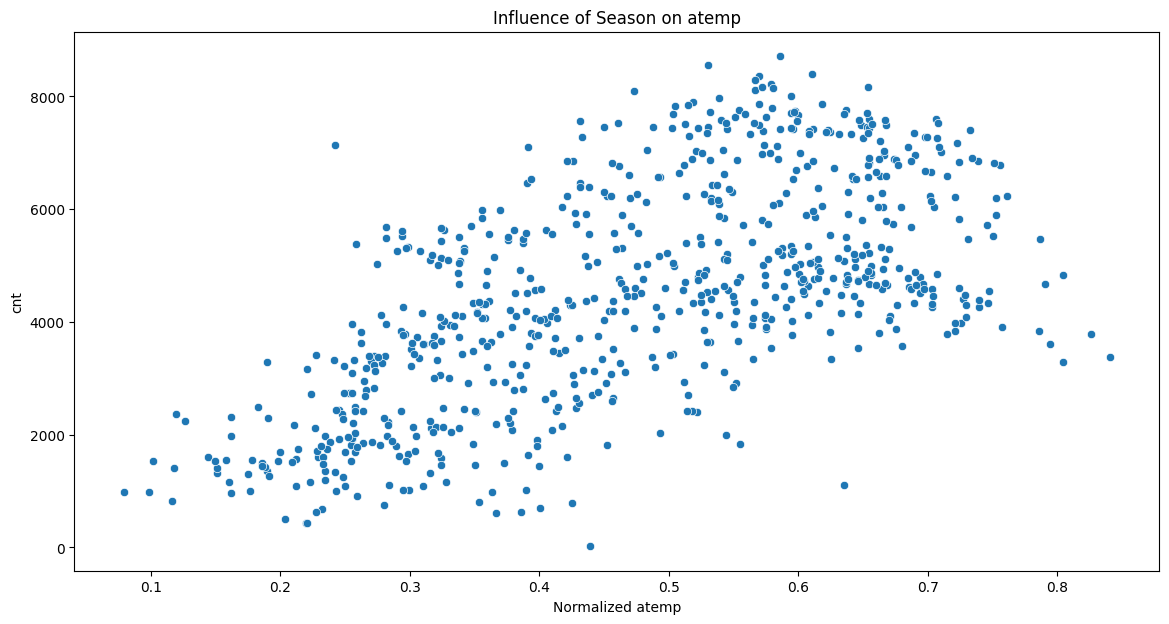

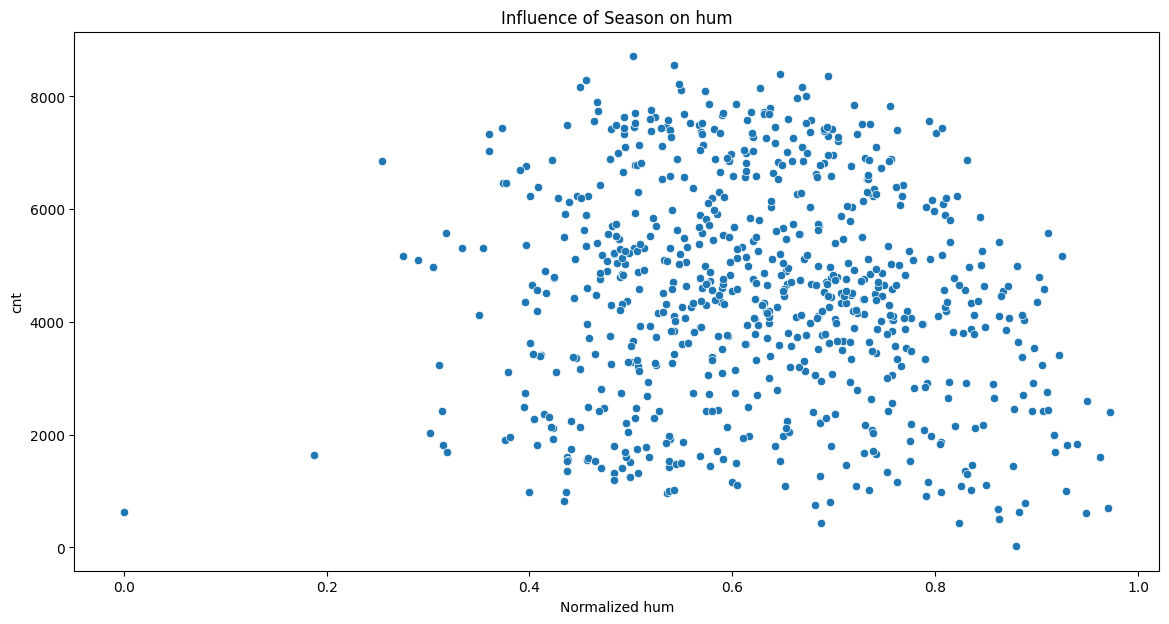

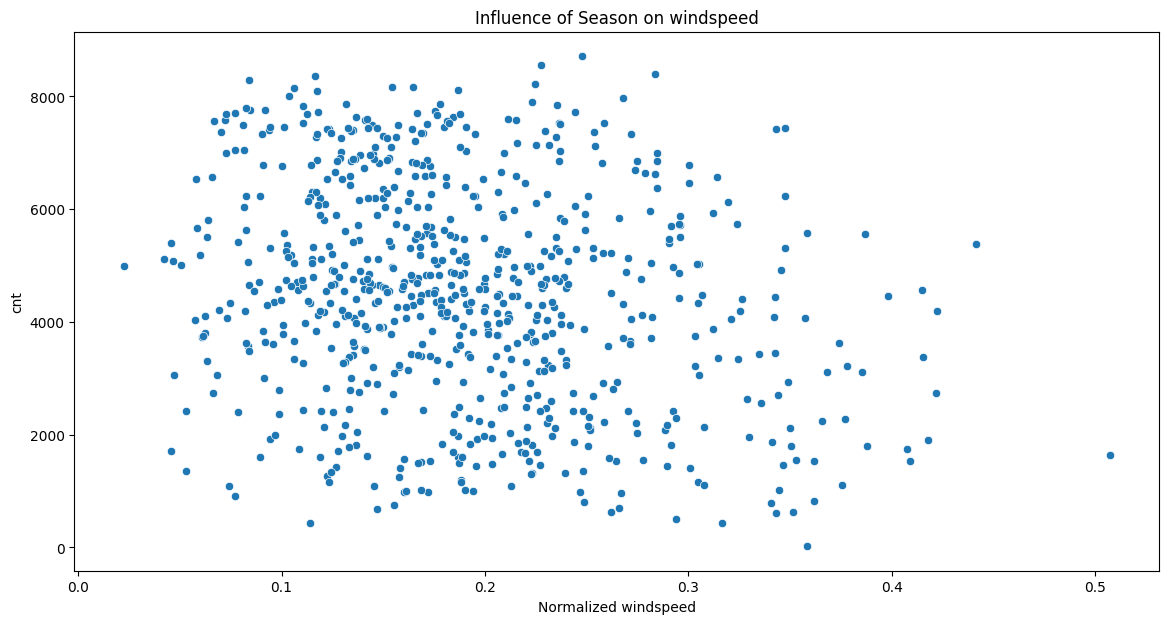

In [23]:
# Menghapus variabel cnt pada numeric_val
numeric_var.remove('cnt')

for i in numeric_var:
    plt.figure(figsize=(14, 7))
    sns.scatterplot(x=i, y='cnt', data=day)
    plt.ylabel('cnt')
    plt.xlabel(f'Normalized {i}')
    plt.title(f'Influence of Season on {i}')
    plt.show()

## Visualization & Explanatory Analysis

### Berapa jumlah perbedaan penyewa sepeda untuk setiap tahunnya?

In [24]:
# Mengelompokkan data berdasarkan tahun (yr) dan menghitung jumlah peminjaman (cnt)
rentals_by_year = day.groupby('yr')['cnt'].sum().reset_index()

# Mengganti nilai 'yr' dengan tahun yang sesuai
rentals_by_year['yr'] = rentals_by_year['yr'].map({0: 2011, 1: 2012})

rentals_by_year

,yr,cnt
0,2011,1243103
1,2012,2049576


- Jumlah peminjaman sepeda di tahun 2012 hampir 2 kali lipat dari jumlah peminjaman di tahun 2011, yaitu 2049576 pada 2012 dan 1243103 pada 2011

### Apakah ada perbedaan pola peminjaman sepeda antara hari kerja dan hari libur?

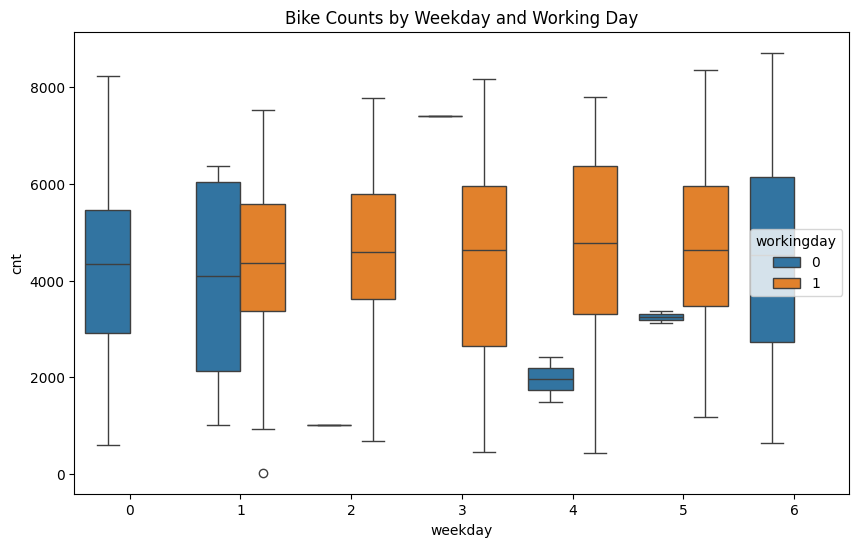

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=day, hue='workingday')
plt.title('Bike Counts by Weekday and Working Day')
plt.show()

- Pola peminjaman sepeda kurang lebih sama untuk setiap harinya
- Peminjaman sepeda lebih banyak dilakukan pada hari libur dalam satu hari, walaupun perbedaan dengan hari kerja tidak terlalu signifikan
- Pada hari kerja cenderung lebih konsisten untuk peminjaman
- Untuk hari kerja peminjaman lebih sering dilakukan pada hari tertentu seperti rabu dan kamis


### Bagaimana tren harian jumlah sepeda yang dipinjam selama periode tertentu?

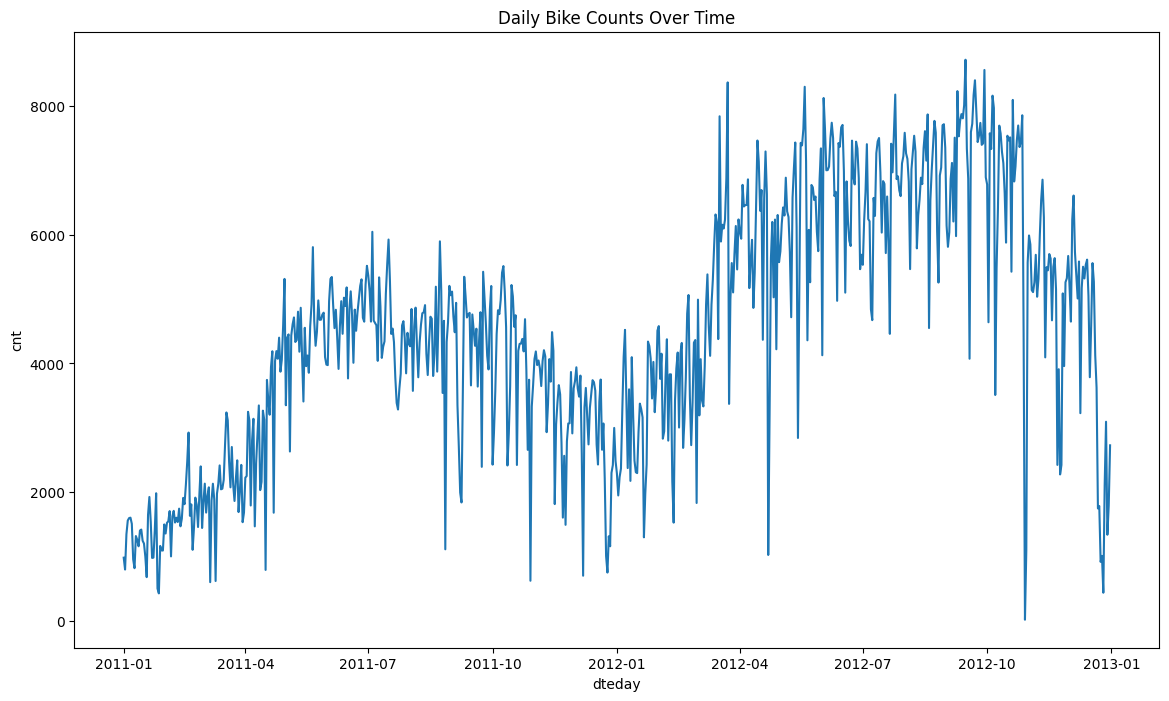

In [26]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='dteday', y='cnt', data=day)
plt.title('Daily Bike Counts Over Time')
plt.show()

In [27]:
season_mapping = {1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}

# Menambahkan kolom baru dengan nilai yang telah dipetakan
day['season_label'] = day['season'].map(season_mapping)

day[['mnth', 'season', 'season_label']].drop_duplicates()

,mnth,season,season_label
0,1,1,springer
31,2,1,springer
59,3,1,springer
79,3,2,summer
90,4,2,summer
120,5,2,summer
151,6,2,summer
171,6,3,fall
181,7,3,fall
212,8,3,fall


- Pada tahun 2011 dan 2012 memiliki beberapa kesamaan. Pada bulan 4 sampai 10 terjadi peningkatan pengguna sepeda setiap tahunnya.
- Terjadi penurunan sejak bulan 10 sampai awal tahun
- Pola setiap tahun sama, walaupun pada 2011 pengguna sepeda lebih sedikit dibandingkan tahun 2012
- Dari grafik dan tabel, kenaikan peminjaman lebih sering dilakukan pada musim panas akhir, musim gugur, dan awal musim dingin. Setelah itu terjadi penurunan
- Kebanyak orang lebih kerap dan konisisten melakukan peminjaman pada musim gugur

### Bagaimana variabilitas harian peminjaman sepeda per jam?

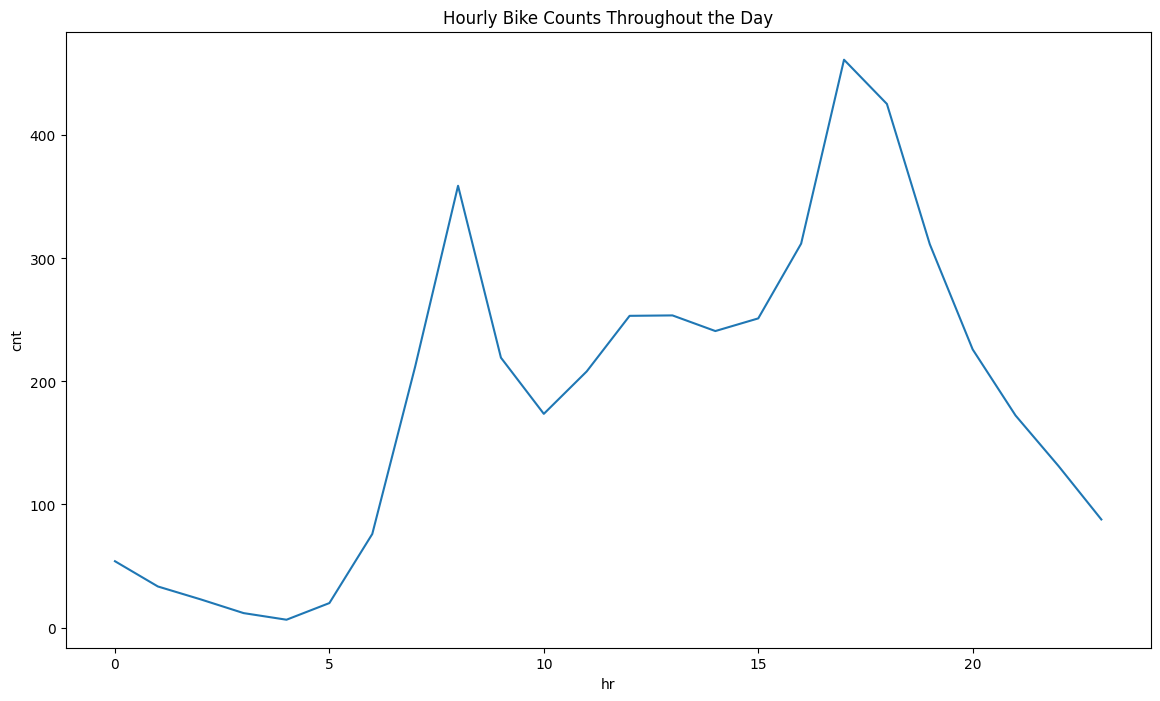

In [33]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='hr', y='cnt', data=hour, errorbar=None)
plt.title('Hourly Bike Counts Throughout the Day')
plt.show()

- Secara keseluruhan, baik hari kerja ataupun hari libur. Peminjaman sepeda lebih tinggi pada jam-jam tertetu
- Siang hari terjadi peningkatan peminjaman dari jam 5-8. Lalu turun sampai jam 10
- Malam hari peningkatan terjadi dari jam 15-18, walaupun peningkatan tidak sesignifikan siang hari. Penurunan terjadi sampai tengah malam

### Apakah terdapat perbedaan pola peminjaman sepeda antara hari kerja dan hari libur per jam?

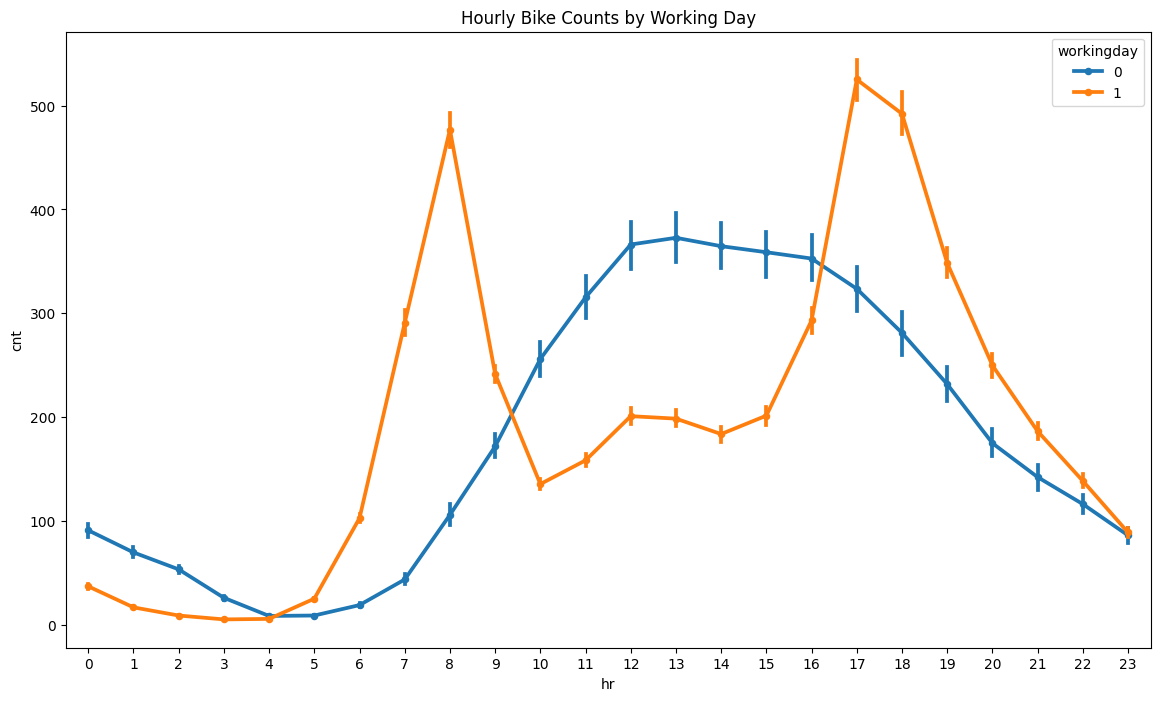

In [29]:
plt.figure(figsize=(14, 8))
sns.pointplot(x='hr', y='cnt', data=hour, hue='workingday', markers='.')
plt.title('Hourly Bike Counts by Working Day')
plt.show()

- Terjadi perbedaan pada hari kerja dan hari libur
- Grafik sebelumnya kurang lebih mirip seperti hari kerja, karena kebiasaan atau kebanyakan orang melakukan peminjaman pada hari kerja pada jam-jam tertentu
- Pada hari libur, orang kebanyakan melakukan peminjaman mulai jam 7 lalu dikembalikan pada sore hari. Berbeda dengan hari kerja, saat hari libur orang-orang cenderung melakukan sekali peminjaman

## Conclusion

1. Jumlah peminjaman sepeda pada tahun 2012 hampir dua kali lipat dari jumlah peminjaman pada tahun 2011, dengan angka mencapai 2.05 juta peminjaman di tahun 2012, dibandingkan dengan 1.24 juta peminjaman di tahun 2011. Peningkatan ini menunjukkan tren positif dalam popularitas penggunaan sepeda dari tahun ke tahun.

2. Secara umum, peminjaman sepeda cenderung seragam setiap harinya meskipun peminjaman lebih tinggi pada hari libur, pola hari kerja lebih konsisten dan menunjukkan kecenderungan peminjaman yang lebih tinggi pada Rabu dan Kamis. Temuan ini dapat menjadi panduan berharga dalam mengoptimalkan penyediaan sepeda dan mengelola kebutuhan pelanggan secara lebih efisien.

3. Tren harian jumlah sepeda yang dipinjam selama periode 2011 dan 2012 menunjukkan konsistensi pola, dengan kenaikan paling signifikan terjadi pada bulan April hingga Oktober dan penurunan sejak bulan Oktober. Peningkatan peminjaman lebih sering terjadi pada musim panas akhir, musim gugur, dan awal musim dingin, sementara musim gugur menonjol sebagai periode dengan peminjaman yang lebih tinggi dan konsisten. Meskipun jumlah peminjaman lebih rendah pada tahun 2011, tren dan pola peminjaman sepeda tetap serupa antara kedua tahun tersebut.

4. Variabilitas harian peminjaman sepeda per jam menunjukkan pola serupa baik pada hari kerja maupun hari libur. Terdapat peningkatan peminjaman pada jam 5-8 pagi, dengan penurunan seiring berjalannya waktu hingga jam 10. Pada malam hari, terjadi peningkatan peminjaman dari jam 15-18, walaupun kurang signifikan dibandingkan dengan siang hari, diikuti penurunan hingga tengah malam.

5. Perbedaan pola peminjaman sepeda antara hari kerja dan hari libur terlihat signifikan. Pada hari kerja, pola peminjaman lebih mirip dengan kebiasaan harian, dengan peningkatan peminjaman pada jam-jam tertentu. Sebaliknya, pada hari libur, terlihat bahwa orang lebih cenderung melakukan satu kali peminjaman pada pagi hari, dimulai dari jam 7, yang kemudian dikembalikan pada sore hari.